In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
pd.options.display.max_columns = 999

In [ ]:
df = pd.read_csv('pivoted.csv')
british = pd.read_csv('british.csv').dropna()
continent = pd.read_csv('continent.csv')
education = pd.read_csv('education.csv')

In [ ]:
education = education.replace('..',np.nan)
education.head()

In [ ]:
df = pd.merge(df, education, on=['Time Code','Country Code'])

In [ ]:
df = df.replace('NaN',np.nan)
df.head()

In [ ]:
from collections import OrderedDict
dd = OrderedDict(sorted(dict(df.isnull().sum()).items(), key=lambda x: x[1]))
print(dd)

In [ ]:
d = dict(df.isnull().sum())
targets = [*{key: d[key] for key in d if d[key] < 1000}]

In [ ]:
len(targets)

In [ ]:
filtered = df[targets].dropna()

In [ ]:
filtered.shape

In [ ]:
dd = OrderedDict(sorted(dict(education.isnull().sum()).items(), key=lambda x: x[1]))
print(dd)

In [ ]:
british.head()

In [ ]:
continent.head()

In [ ]:
set(british['Current country'])

In [ ]:
crown = df[df['Country Name_x'].isin(british['Current country'])]

In [ ]:
continent.head()

In [ ]:
filtered.head()

In [ ]:
filtered.dropna()['Country Code'].value_counts()

In [ ]:
filtered.head()

In [ ]:
y = filtered['GDP (current US$) [NY.GDP.MKTP.CD]']
X = filtered.drop(['GDP (current US$) [NY.GDP.MKTP.CD]','Time_x','Time Code','Country Name_x','Country Code','GNI, Atlas method (current US$) [NY.GNP.ATLS.CD]','GNI, PPP (current international $) [NY.GNP.MKTP.PP.CD]','Country Name_y'], 1)
rf = RandomForestRegressor()
rf.fit(X, y)
names = X.dtypes.index
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), reverse=True))

In [ ]:
[*filtered.columns]

In [ ]:
y = filtered['GDP per capita (current US$) [NY.GDP.PCAP.CD]']
X = filtered.drop(['GDP per capita (current US$) [NY.GDP.PCAP.CD]','GDP (current US$) [NY.GDP.MKTP.CD]','Time_x','Time_y','Time Code','Country Name_x','Country Name_y','Country Code','GNI, Atlas method (current US$) [NY.GNP.ATLS.CD]','GNI, PPP (current international $) [NY.GNP.MKTP.PP.CD]','GNI per capita, Atlas method (current US$) [NY.GNP.PCAP.CD]','GNI per capita, PPP (current international $) [NY.GNP.PCAP.PP.CD]'], 1)
X = X.astype('float64')
rf = RandomForestRegressor()
rf.fit(X, y)
names = X.dtypes.index
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), reverse=True))

In [ ]:
def regression(y, X):
    import statsmodels.api as sm
    import matplotlib.pyplot as plt
    from sklearn.metrics import mean_squared_error
    X = X
    y = y
    model = sm.OLS(y, X)
    model = model.fit()
    predictions = model.predict(X)

    # Plot the model
    plt.figure(figsize=(8,6))
    plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
    plt.xlabel("Predicted Values - $\hat{y}$")
    plt.ylabel("Actual Values - $y$")
    plt.show()
    print("MSE:", mean_squared_error(y, predictions))
    return model.summary()

In [ ]:
regression(y,
           X)

In [ ]:
x = filtered['Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS]']
plt.scatter(x, y, alpha=0.5)
plt.show()

In [ ]:
type(X)

In [ ]:
y

In [ ]:
X.head()

In [ ]:
df['Secondary education, duration (years) [SE.SEC.DURS]']

# British dimension

In [ ]:
filtered.head()

In [ ]:
set(british['Current country'])

In [ ]:
britain = filtered[filtered['Country Name_x'].isin([*set(british['Current country'])])]
britain

In [ ]:
nobritain = filtered[~filtered['Country Name_x'].isin([*set(british['Current country'])])]
nobritain

In [ ]:
britain['Colony'] = 1
nobritain['Colony'] = 0

In [ ]:
nobritain

In [ ]:
filtered = pd.concat([britain, nobritain])

In [ ]:
filtered

In [ ]:
y = filtered['GDP per capita (current US$) [NY.GDP.PCAP.CD]']
X = filtered.drop(['GDP per capita (current US$) [NY.GDP.PCAP.CD]','GDP (current US$) [NY.GDP.MKTP.CD]','Time_x','Time_y','Time Code','Country Name_x','Country Name_y','Country Code','GNI, Atlas method (current US$) [NY.GNP.ATLS.CD]','GNI, PPP (current international $) [NY.GNP.MKTP.PP.CD]','GNI per capita, Atlas method (current US$) [NY.GNP.PCAP.CD]','GNI per capita, PPP (current international $) [NY.GNP.PCAP.PP.CD]'], 1)
X = X.astype('float64')
rf = RandomForestRegressor()
rf.fit(X, y)
names = X.dtypes.index
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), reverse=True))

In [ ]:
regression(y,
           X)

In [ ]:
y = filtered['GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]']
X = filtered.drop(['GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]','Time_x','Time_y','Time Code','Country Name_x','Country Name_y','Country Code','GNI, PPP (current international $) [NY.GNP.MKTP.PP.CD]','GNI per capita, Atlas method (current US$) [NY.GNP.PCAP.CD]','GNI per capita, PPP (current international $) [NY.GNP.PCAP.PP.CD]'], 1)
X = X.astype('float64')
rf = RandomForestRegressor()
rf.fit(X, y)
names = X.dtypes.index
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), reverse=True))

In [ ]:
regression(y,
           X)

# Poor

In [ ]:
poor = filtered[filtered['GDP per capita (current US$) [NY.GDP.PCAP.CD]'] < 20000]

In [ ]:
y = poor['GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]']
X = poor.drop(['GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]','Time_x','Time_y','Time Code','Country Name_x','Country Name_y','Country Code','GNI, PPP (current international $) [NY.GNP.MKTP.PP.CD]','GNI per capita, Atlas method (current US$) [NY.GNP.PCAP.CD]','GNI per capita, PPP (current international $) [NY.GNP.PCAP.PP.CD]'], 1)
X = X.astype('float64')
rf = RandomForestRegressor()
rf.fit(X, y)
names = X.dtypes.index
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), reverse=True))

In [ ]:
regression(y,X)

In [ ]:
y = poor['GDP per capita (current US$) [NY.GDP.PCAP.CD]']
X = poor.drop(['GDP per capita (current US$) [NY.GDP.PCAP.CD]','GDP (current US$) [NY.GDP.MKTP.CD]','Time_x','Time_y','Time Code','Country Name_x','Country Name_y','Country Code','GNI, Atlas method (current US$) [NY.GNP.ATLS.CD]','GNI, PPP (current international $) [NY.GNP.MKTP.PP.CD]','GNI per capita, Atlas method (current US$) [NY.GNP.PCAP.CD]','GNI per capita, PPP (current international $) [NY.GNP.PCAP.PP.CD]'], 1)
X = X.astype('float64')
rf = RandomForestRegressor()
rf.fit(X, y)
names = X.dtypes.index
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), reverse=True))

In [ ]:
regression(y,X)

# Rich

In [91]:
poor = filtered[filtered['GDP per capita (current US$) [NY.GDP.PCAP.CD]'] > 20000]

In [92]:
y = poor['GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]']
X = poor.drop(['GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]','Time_x','Time_y','Time Code','Country Name_x','Country Name_y','Country Code','GNI, PPP (current international $) [NY.GNP.MKTP.PP.CD]','GNI per capita, Atlas method (current US$) [NY.GNP.PCAP.CD]','GNI per capita, PPP (current international $) [NY.GNP.PCAP.PP.CD]'], 1)
X = X.astype('float64')
rf = RandomForestRegressor()
rf.fit(X, y)
names = X.dtypes.index
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), reverse=True))

Features sorted by their score:
[(0.15840000000000001, 'Gross capital formation (% of GDP) [NE.GDI.TOTL.ZS]'), (0.081100000000000005, 'Population growth (annual %) [SP.POP.GROW]'), (0.077700000000000005, 'Inflation, GDP deflator (annual %) [NY.GDP.DEFL.KD.ZG]'), (0.074700000000000003, 'Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]'), (0.070499999999999993, 'Forest area (sq. km) [AG.LND.FRST.K2]'), (0.0402, 'Industry (including construction), value added (% of GDP) [NV.IND.TOTL.ZS]'), (0.0402, 'Agriculture, forestry, and fishing, value added (% of GDP) [NV.AGR.TOTL.ZS]'), (0.0356, 'Life expectancy at birth, total (years) [SP.DYN.LE00.IN]'), (0.0332, 'CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC]'), (0.032800000000000003, 'Mortality rate, under-5 (per 1,000 live births) [SH.DYN.MORT]'), (0.031600000000000003, 'Net barter terms of trade index (2000 = 100) [TT.PRI.MRCH.XD.WD]'), (0.029499999999999998, 'Immunization, measles (% of children ages 12-23 months) [SH.IMM.MEAS]

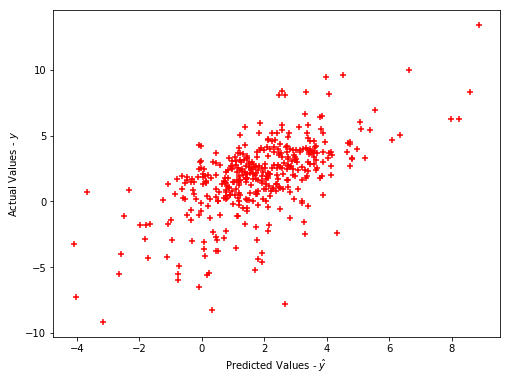

MSE: 5.05375293151


<class 'statsmodels.iolib.summary.Summary'>
"""
                                        OLS Regression Results                                       
=====================================================================================================
Dep. Variable:     GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]   R-squared:                       0.382
Model:                                                   OLS   Adj. R-squared:                  0.326
Method:                                        Least Squares   F-statistic:                     6.753
Date:                                       Sat, 08 Sep 2018   Prob (F-statistic):           2.95e-22
Time:                                               11:21:32   Log-Likelihood:                -878.23
No. Observations:                                        394   AIC:                             1824.
Df Residuals:                                            360   BIC:                             1960.
Df Model:                                                 33                                         
Covariance Type:                                   nonrobust                                         
=================================================================================================================================================
                                                                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------
Population, total [SP.POP.TOTL]                                               -7.035e-09   1.53e-08     -0.460      0.646   -3.71e-08    2.31e-08
Population growth (annual %) [SP.POP.GROW]                                        0.1305      0.216      0.604      0.546      -0.294       0.555
Surface area (sq. km) [AG.SRF.TOTL.K2]                                        -4.942e-08    2.4e-07     -0.206      0.837   -5.22e-07    4.23e-07
GNI, Atlas method (current US$) [NY.GNP.ATLS.CD]                              -2.378e-13   1.14e-12     -0.209      0.835   -2.48e-12       2e-12
Life expectancy at birth, total (years) [SP.DYN.LE00.IN]                         -0.1329      0.065     -2.037      0.042      -0.261      -0.005
Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]                         2.1096      0.556      3.791      0.000       1.015       3.204
Adolescent fertility rate (births per 1,000 women ages 15-19) [SP.ADO.TFRT]       0.0124      0.037      0.335      0.738      -0.060       0.085
Mortality rate, under-5 (per 1,000 live births) [SH.DYN.MORT]                    -0.4463      0.132     -3.373      0.001      -0.707      -0.186
Immunization, measles (% of children ages 12-23 months) [SH.IMM.MEAS]            -0.0027      0.030     -0.091      0.927      -0.061       0.056
Forest area (sq. km) [AG.LND.FRST.K2]                                         -1.043e-07   7.77e-07     -0.134      0.893   -1.63e-06    1.42e-06
CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC]                          -0.0359      0.061     -0.586      0.558      -0.156       0.085
GDP (current US$) [NY.GDP.MKTP.CD]                                             3.775e-13    1.4e-12      0.270      0.787   -2.37e-12    3.13e-12
Inflation, GDP deflator (annual %) [NY.GDP.DEFL.KD.ZG]                            0.1164      0.050      2.318      0.021       0.018       0.215
Agriculture, forestry, and fishing, value added (% of GDP) [NV.AGR.TOTL.ZS]       0.0365      0.128      0.285      0.776      -0.215       0.288
Industry (including construction), value added (% of GDP) [NV.IND.TOTL.ZS]       -0.0281      0.047     -0.602      0.547      -0.120       0.064
Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS]                         0.1034      0.047      2.200      0.028       0.011       0.196
Imports of goods and services (% of GDP) [NE.IMP.GNFS.ZS

In [93]:
regression(y,X)

In [94]:
y = poor['GDP per capita (current US$) [NY.GDP.PCAP.CD]']
X = poor.drop(['GDP per capita (current US$) [NY.GDP.PCAP.CD]','GDP (current US$) [NY.GDP.MKTP.CD]','Time_x','Time_y','Time Code','Country Name_x','Country Name_y','Country Code','GNI, Atlas method (current US$) [NY.GNP.ATLS.CD]','GNI, PPP (current international $) [NY.GNP.MKTP.PP.CD]','GNI per capita, Atlas method (current US$) [NY.GNP.PCAP.CD]','GNI per capita, PPP (current international $) [NY.GNP.PCAP.PP.CD]'], 1)
X = X.astype('float64')
rf = RandomForestRegressor()
rf.fit(X, y)
names = X.dtypes.index
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), reverse=True))

Features sorted by their score:
[(0.26079999999999998, 'Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS]'), (0.1026, 'Personal remittances, paid (current US$) [BM.TRF.PWKR.CD.DT]'), (0.097799999999999998, 'Population, total [SP.POP.TOTL]'), (0.073099999999999998, 'Agriculture, forestry, and fishing, value added (% of GDP) [NV.AGR.TOTL.ZS]'), (0.0683, 'Adjusted savings: education expenditure (current US$) [NY.ADJ.AEDU.CD]'), (0.052600000000000001, 'Primary education, duration (years) [SE.PRM.DURS]'), (0.035000000000000003, 'Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]'), (0.032500000000000001, 'CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC]'), (0.025700000000000001, 'Gross capital formation (% of GDP) [NE.GDI.TOTL.ZS]'), (0.025100000000000001, 'Mortality rate, under-5 (per 1,000 live births) [SH.DYN.MORT]'), (0.020799999999999999, 'Forest area (sq. km) [AG.LND.FRST.K2]'), (0.020199999999999999, 'Adjusted savings: education expenditure (% of GNI) [NY.ADJ.AE

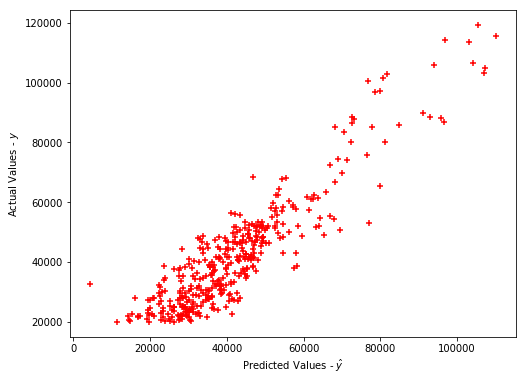

MSE: 61161891.2488


<class 'statsmodels.iolib.summary.Summary'>
"""
                                          OLS Regression Results                                         
=========================================================================================================
Dep. Variable:     GDP per capita (current US$) [NY.GDP.PCAP.CD]   R-squared:                       0.831
Model:                                                       OLS   Adj. R-squared:                  0.816
Method:                                            Least Squares   F-statistic:                     57.35
Date:                                           Sat, 08 Sep 2018   Prob (F-statistic):          4.37e-120
Time:                                                   11:21:33   Log-Likelihood:                -4091.1
No. Observations:                                            394   AIC:                             8246.
Df Residuals:                                                362   BIC:                             8373.
Df Model:                                                     31                                         
Covariance Type:                                       nonrobust                                         
=================================================================================================================================================
                                                                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------
Population, total [SP.POP.TOTL]                                                  -0.0002   3.69e-05     -5.479      0.000      -0.000      -0.000
Population growth (annual %) [SP.POP.GROW]                                    -2638.7660    735.905     -3.586      0.000   -4085.951   -1191.581
Surface area (sq. km) [AG.SRF.TOTL.K2]                                           -0.0035      0.001     -4.346      0.000      -0.005      -0.002
Life expectancy at birth, total (years) [SP.DYN.LE00.IN]                       -286.4583    226.713     -1.264      0.207    -732.298     159.382
Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]                     -3290.0963   1948.701     -1.688      0.092   -7122.292     542.099
Adolescent fertility rate (births per 1,000 women ages 15-19) [SP.ADO.TFRT]     494.2092    119.184      4.147      0.000     259.829     728.590
Mortality rate, under-5 (per 1,000 live births) [SH.DYN.MORT]                 -4759.1107    376.021    -12.657      0.000   -5498.570   -4019.652
Immunization, measles (% of children ages 12-23 months) [SH.IMM.MEAS]          -263.2704    102.262     -2.574      0.010    -464.373     -62.168
Forest area (sq. km) [AG.LND.FRST.K2]                                             0.0154      0.003      5.977      0.000       0.010       0.020
CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC]                         126.5936    212.039      0.597      0.551    -290.390     543.577
GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]                                      -346.9604    181.912     -1.907      0.057    -704.697      10.777
Inflation, GDP deflator (annual %) [NY.GDP.DEFL.KD.ZG]                         -119.2099    175.315     -0.680      0.497    -463.974     225.555
Agriculture, forestry, and fishing, value added (% of GDP) [NV.AGR.TOTL.ZS]   -3200.5542    394.147     -8.120      0.000   -3975.659   -2425.450
Industry (including construction), value added (% of GDP) [NV.IND.TOTL.ZS]    -1809.7676    130.202    -13.900      0.000   -2065.814   -1553.721
Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS]                      2009.6594    123.242     16.307      0.000    1767.300    2252.019
Imports of goods and services (% of GDP) [NE.IMP.GNFS.ZS]                     -2244.8771    143.841    -15.607      0.000   -2527.745   -1962.009
Gross capita

In [95]:
regression(y,X)

In [98]:
poor[poor['Colony'] == 1]['Country Name_x'].value_counts()

United States     15
United Kingdom    15
Australia         14
New Zealand       12
Cyprus            12
Canada             8
Malta              7
Saudi Arabia       5
Name: Country Name_x, dtype: int64